
# Billionaires Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [4]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
df.shape

(2640, 35)

In [6]:
# finding information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization


# Data cleaning

In [7]:
# renaming columns

df.rename(columns = {'finalWorth' : 'net_worth', 'personName' : 'Name', 'source' : 'company', 'title' : 'designation',
                     'tax_revenue_country_country' : 'tax_revenue_country', 'selfMade' : 'Self_Made_Billionaire'},
            inplace = True)

In [8]:
df.head(1)

,rank,net_worth,category,Name,age,country,city,company,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749


In [9]:
# droping similar columns

df.drop(['lastName', 'firstName', 'birthYear','birthMonth', 'birthDay', 'life_expectancy_country', 'organization', 
         'industries', 'date', 'latitude_country', 'longitude_country', 'status', 'birthDate'],
        axis = 1, inplace = True)

In [10]:
df.shape

(2640, 22)

In [11]:
# droping duplicates

df.drop_duplicates(inplace = True)

In [12]:
df.shape  # There is no duplicate value in this table

(2640, 22)

In [13]:
# finding mean ages of billionaires

mean_age = int(df['age'].mean())

In [14]:
# Filling missing age column by mean age

df['age'].fillna(mean_age, inplace = True)


In [15]:
i = 0
str1 = ""
for i in range(len(df)):
    
    if (df['state'][i] is not np.nan and df ['residenceStateRegion'][i] is not np.nan):
        str1 = str(df['residenceStateRegion'][i] + ' ' + str(df['state'][i]))

    elif (df['state'][i] is not np.nan):
        str1 = str(df['state'][i])

    elif (df['residenceStateRegion'][i] is not np.nan):
        str1 = str(df['residenceStateRegion'][i])

    else:
        str1 = 'Unknown'
        
    print(str1)
    


Unknown
South Texas
West Washington
West Hawaii
Midwest Nebraska
West Washington
Northeast New York
Unknown
Unknown
West Washington
Unknown
West California
Unknown
West California
Unknown
West California
Midwest Kansas
Northeast New York
South Arkansas
South Arkansas
South Texas
Unknown
South Texas
Unknown
West Oregon
Unknown
Unknown
Unknown
Unknown
Unknown
South Virginia
South Wyoming
Unknown
Unknown
West Nevada
South Florida
Unknown
Unknown
Unknown
Unknown
Northeast New York
Northeast New York
Unknown
Unknown
Unknown
Unknown
Unknown
Northeast Pennsylvania
Northeast New York
Northeast New York
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
South Florida
Unknown
Unknown
West Washington
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Northeast Massachusetts
Unknown
Midwest Illinois
Unknown
West California
Northeast New York
Unknown
Unknown
Unknown
South Tennessee
Unknown
Northeast Connecticut
Unknown
Unknown
Unknown
Unknown
Unknown
South Oklahoma

In [16]:
# checking if both values are same in country(has 38 null values) and countryOfCitizenship(has 0 null value)

i = 0
diff_value = 0

for i in range(len(df)):
    
    if (df['country'][i] != df['countryOfCitizenship'][i]):
        diff_value = diff_value + 1

print (diff_value)

316


In [17]:
# filling null values with Unknow

df['country'] = df['country'].fillna('Unknown')
df['city'] = df['city'].fillna('Unknown')
df['designation'] = df['designation'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')
df['residenceStateRegion'] = df['residenceStateRegion'].fillna('Unknown')

In [18]:
# filling null with mean and median

df['cpi_country'].fillna(df['cpi_country'].mean(), inplace = True)
df['cpi_change_country'].fillna(df['cpi_change_country'].mean(), inplace = True)
df['gross_tertiary_education_enrollment'].fillna(df['gross_tertiary_education_enrollment'].mean(), inplace = True)
df['gross_primary_education_enrollment_country'].fillna(df['gross_primary_education_enrollment_country'].mean(), inplace = True)
df['tax_revenue_country'].fillna(df['tax_revenue_country'].mean(), inplace = True)
df['total_tax_rate_country'].fillna(df['total_tax_rate_country'].mean(), inplace = True)
df['population_country'].fillna(np.median(df['population_country']), inplace = True)

In [19]:
# Removing $ sign and comma(,) with the help of regex

df['gdp_country'].replace('[$,]', '', regex = True, inplace = True)

In [20]:
# filling with 0 for further calcuation but will be removed by weighted mean

df['gdp_country'].fillna(0, inplace = True)

In [21]:
# function to convert the values in float and change the number in Billion and round till 2 places

a = ''

def to_int(a):
    a = float(a)
    return round(a/100000000000, 2)


In [22]:
# changing gdp_column from string to float(In Billion)

i = 0
for i in range(len(df)):
    df['gdp_country'][i] = to_int(df['gdp_country'][i])

C:\Users\praveen kumar yadav\AppData\Local\Temp\ipykernel_21824\2026503607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gdp_country'][i] = to_int(df['gdp_country'][i])


In [23]:
# calculation of weighted mean on gdp_country

i = 0
prod = 0
total = 0 
weighted_mean  = 0

for i in range(len(df)):
    if df['gdp_country'][i] != 0 and df['population_country'][i] is not np.nan :
        prod = prod + df['gdp_country'][i] * df['population_country'][i]
        total = total + df['population_country'][i]
    
weighted_mean = round(prod/total, 2)


# filling gdp_country column with weighted_mean where i put 0 for calculation purpose

i = 0
j = 0
for i in range(len(df)):
    if df['gdp_country'][i] == 0:
        df['gdp_country'][i] = weighted_mean


C:\Users\praveen kumar yadav\AppData\Local\Temp\ipykernel_21824\3354474162.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gdp_country'][i] = weighted_mean



# Data Visulisation

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2639
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   net_worth                                   2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   Name                                        2640 non-null   object 
 4   age                                         2640 non-null   float64
 5   country                                     2640 non-null   object 
 6   city                                        2640 non-null   object 
 7   company                                     2640 non-null   object 
 8   countryOfCitizenship                        2640 non-null   object 
 9   Self_Made_Billionaire                       2640 non-null   bool   
 10  gender      

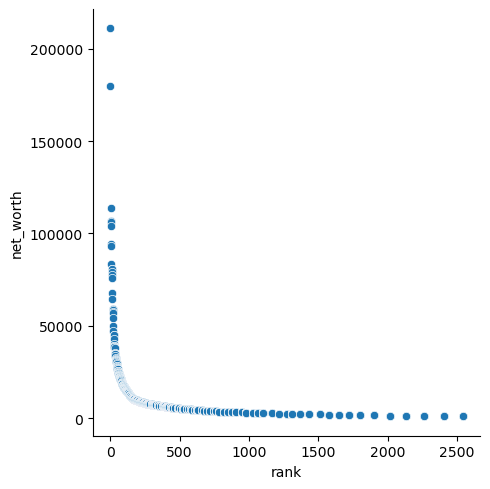

In [25]:
sns.relplot(x='rank', y = 'net_worth', data = df)

Net worth of top order billionaires are much higher then the lower






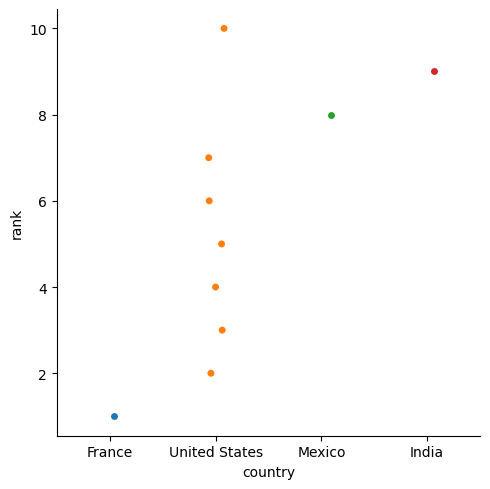

In [26]:

sns.catplot(x='country', y = 'rank', kind = 'strip', data = df.head(10))


Top 10 billionaries are only from 4 coutries in which 7 are living in USA

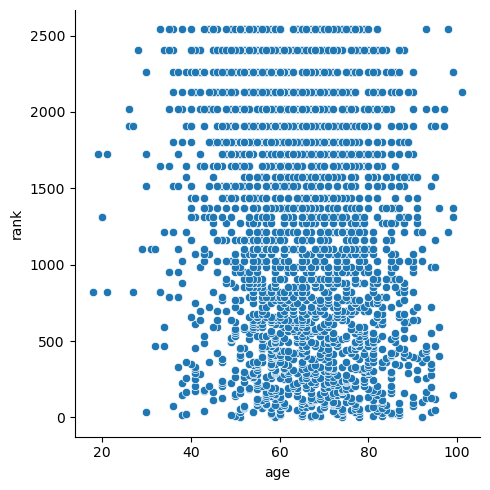

In [27]:
sns.relplot(x='age', y = 'rank', data = df)

Most of the billionaires are Male. Top billionaires are almost between 40 to 90 years old. As ranking decreases the age does'nt matter more.



<AxesSubplot:xlabel='age', ylabel='gender'>

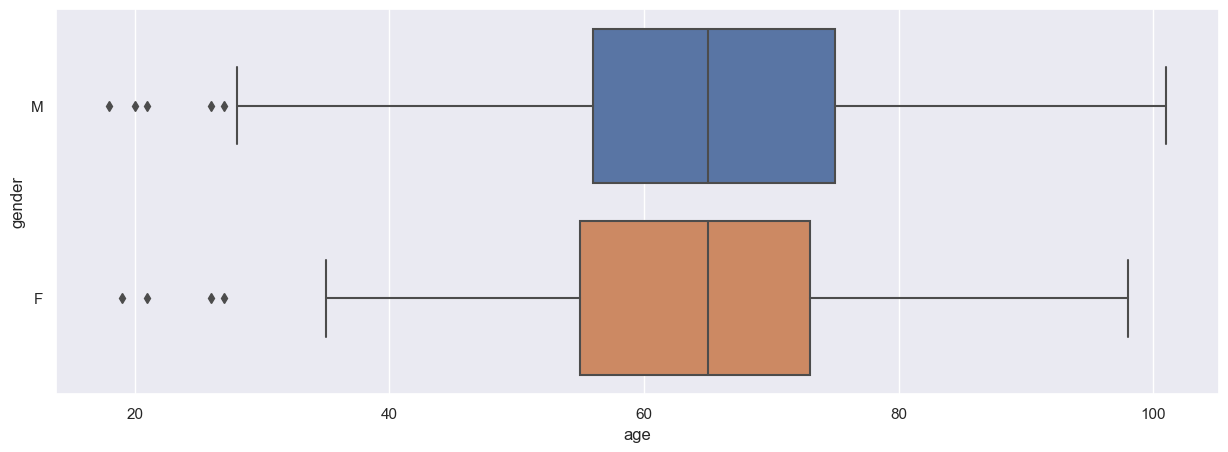

In [28]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = 'age', y = 'gender', data = df)

Top 25 percentile billioniares are of 55 median are in 65 and 75 percentile are in 75 age

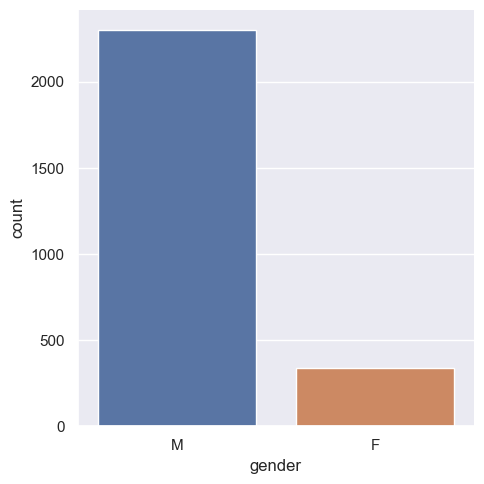

In [29]:
sns.catplot(x= 'gender', kind = 'count', data = df)

Most Billionaires are male

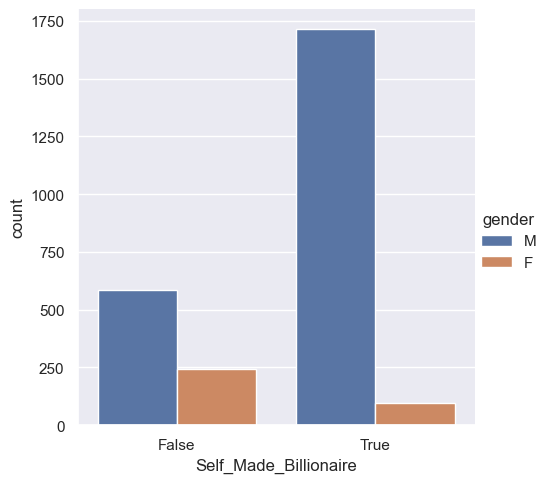

In [30]:
sns.catplot(x= 'Self_Made_Billionaire', kind = 'count', hue = 'gender', data = df)

From this garph, we can conclude that Most of the self billioaire are male then female, the chance of getting billionaire is more when you are male.

Also self made female billionaires are less in number then inherited.

In [31]:
data = df.groupby('age', as_index = False, group_keys = False).sum()

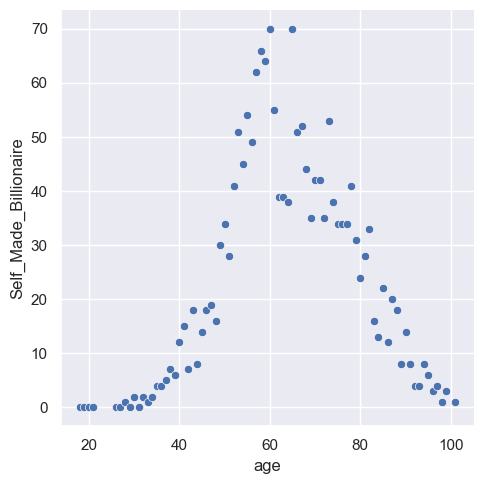

In [32]:
sns.relplot(x ='age', y = 'Self_Made_Billionaire', kind = 'scatter', data = data)

As age increase no of billionairs are also increase till 60 as this is retirement time. And after 60 no of billionaires starts decreasing but the probability of finding billionaires in each age group is more.

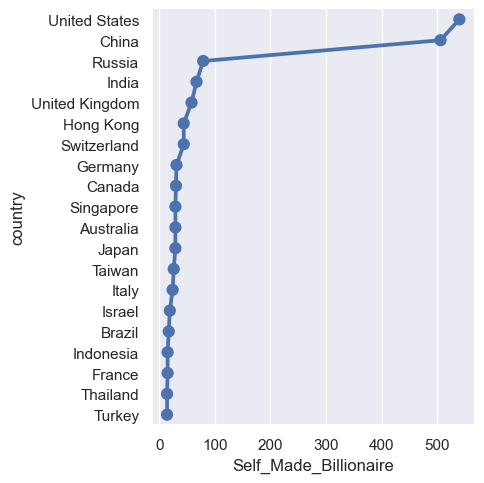

In [33]:
data = df.groupby('country', as_index = False, group_keys = False).sum().sort_values('Self_Made_Billionaire', ascending = False).head(20)
sns.catplot(y ='country', x = 'Self_Made_Billionaire',  kind = 'point' , data = data)

United States has maximum number of billionaries followed by China, Russia, India and United Kindom

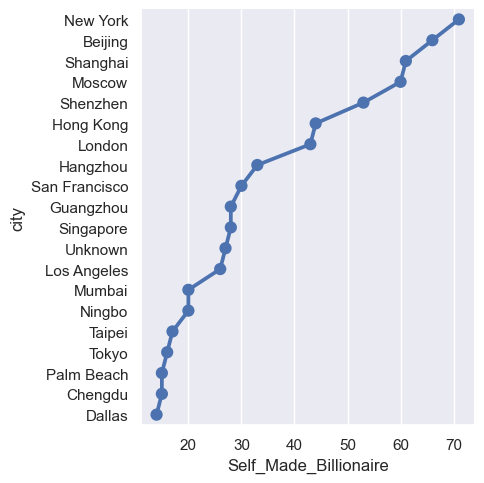

In [34]:
data = df.groupby('city', as_index = False, group_keys = False).sum().sort_values('Self_Made_Billionaire', ascending = False).head(20)
sns.catplot(y ='city', x = 'Self_Made_Billionaire',  kind = 'point' , data = data)

Most of the billionaries are living in New York, Beijing, Shanghai and Moscow respectively.

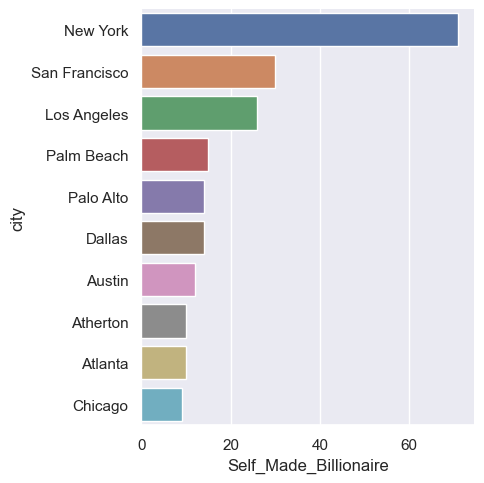

In [35]:
mask_usa = df['country'] == 'United States'

united_states = df[mask_usa &  ['city']]

data = united_states.groupby('city', as_index = False, group_keys = False).sum().sort_values('Self_Made_Billionaire', ascending = False).head(10)
sns.catplot(y ='city', x = 'Self_Made_Billionaire',  kind = 'bar', data = data)

As we visualize above that USA has maximum number of billionaires. From this graph we can conclude that Most of the billionaires are living in New York, followed by San Francisco and Los Angeles

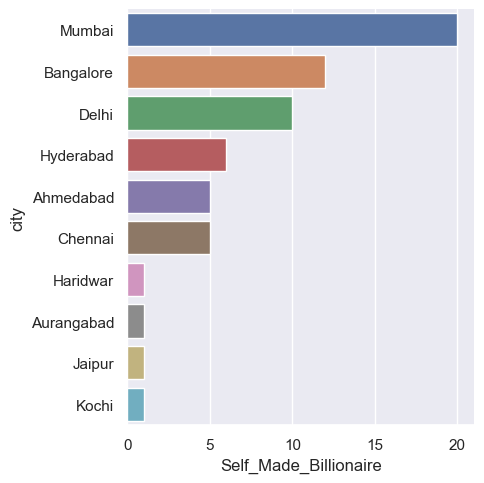

In [36]:
mask_in = df['country'] == 'India'

India = df[mask_in &  ['city']]

data = India.groupby('city', as_index = False, group_keys = False).sum().sort_values('Self_Made_Billionaire', ascending = False).head(10)
sns.catplot(y ='city', x = 'Self_Made_Billionaire',  kind = 'bar', data = data)

In India Most of the billionaires are living in Mumbai followed by Bangalore, Delhi, Hyderabad and Ahmedabad

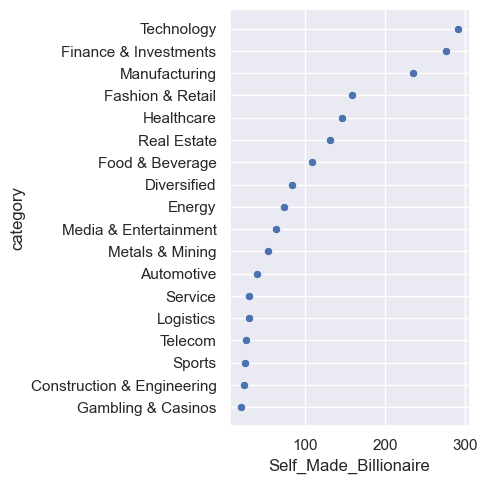

In [37]:
data = df.groupby('category', as_index = False, group_keys = False).sum().sort_values('Self_Made_Billionaire', ascending = False)
sns.relplot(x = 'Self_Made_Billionaire', y ='category', kind = 'scatter', data = data)

Technology sector have highest  number of billionaires, then Finance and Investments.

In [38]:
df2 = df.drop_duplicates('country')

In [39]:
country_wise = df2.sort_values(by = 'gdp_country', ascending = False)

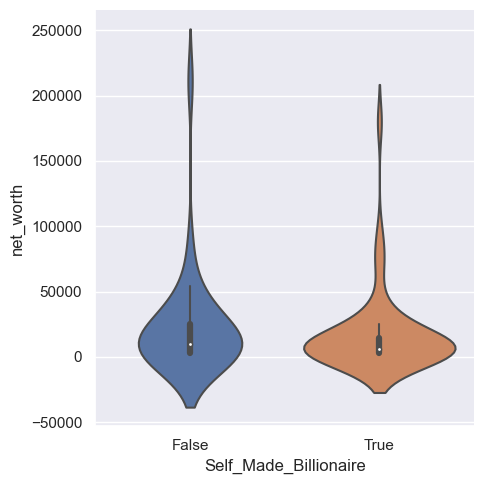

In [40]:
sns.catplot(x='Self_Made_Billionaire', y = 'net_worth', kind = 'violin', data = country_wise)

distribution of self made billionaires are higher then inherited but median net_worth of inherited billionaire are more also top 75 percentile are more 

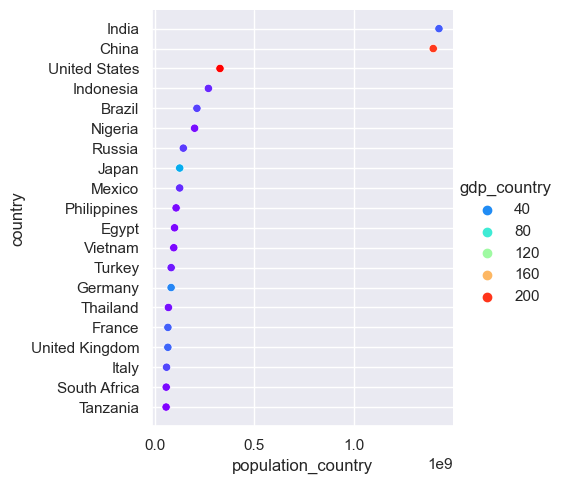

In [41]:
country_wise = df2.sort_values(by = 'population_country', ascending = False)
sns.relplot(y='country', x = 'population_country', hue = 'gdp_country', palette = 'rainbow', data = country_wise.head(20))

In [42]:
pairs = df[['net_worth', 'category', 'country', 'age', 'designation', 'population_country', 'total_tax_rate_country', 'Self_Made_Billionaire'] ]

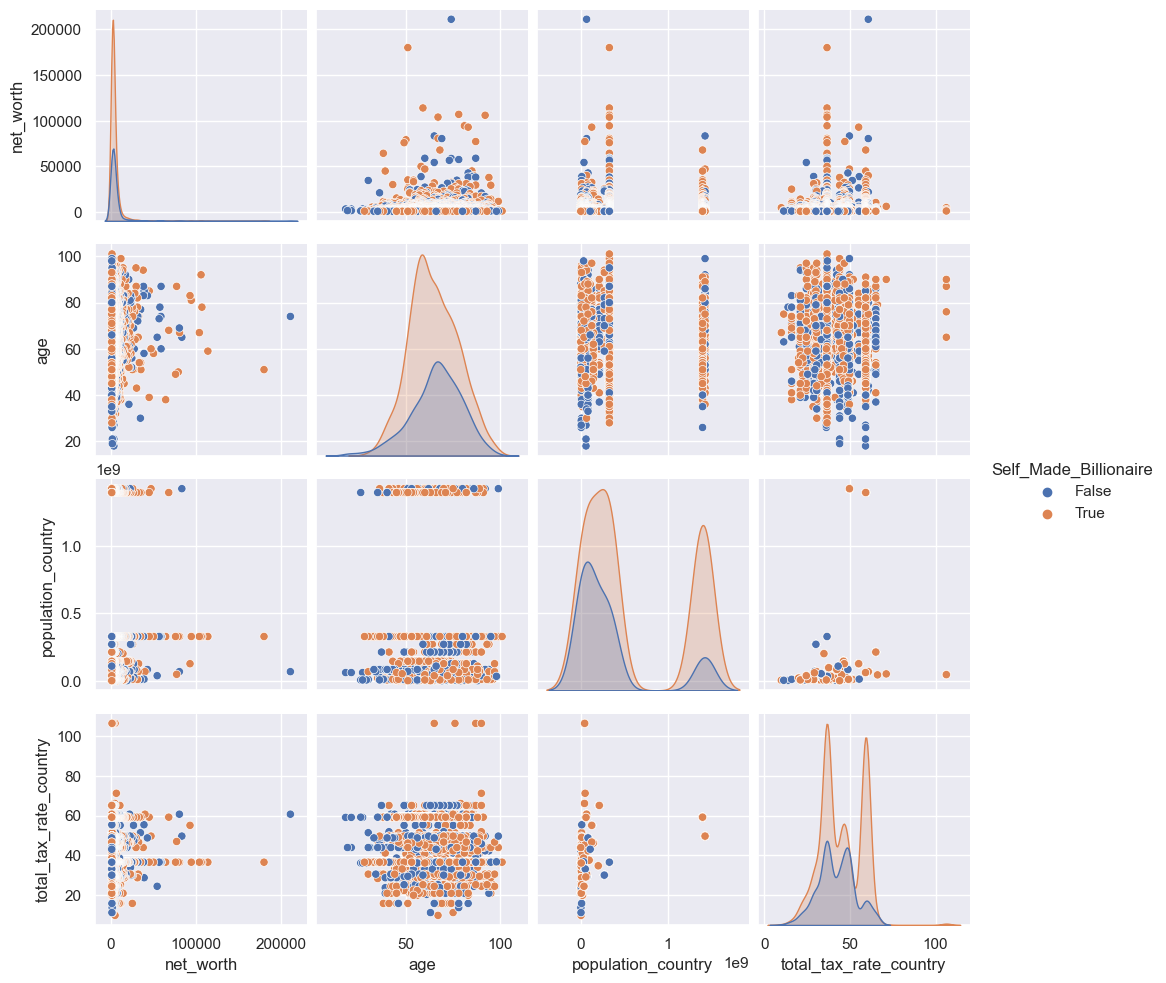

In [43]:
sns.pairplot(pairs, hue = 'Self_Made_Billionaire')